In [1]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns
import env
import joint_prepare

In [2]:
url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/curriculum_logs'
query = '''
Select * from logs
left join cohorts on logs.cohort_id = cohorts.id
ORDER BY date ASC, time ASC;
'''
df = pd.read_sql(query, url)

In [4]:
df,df_admin = joint_prepare.prepare_logs(df )

In [5]:
df.head()

,date,time,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,program_id,primary_topic,subtopic,tertiary
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,1.0,,,None
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,1.0,java-ii,None,None
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,1.0,java-ii,object-oriented-programming,None
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,1.0,slides,object_oriented_programming,None
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2.0,javascript-i,conditionals,None


In [ ]:
g = sns.catplot(x="name", hue="program_id",
                data=df, kind="count",
                height=8, aspect=1);

Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?
boolean column showing whether row accessed path in between start/end date of student (user id, being unique)

In [146]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

In [6]:
df.head(2)

,date,time,path,user_id,cohort_id,ip,name,start_date,end_date,created_at,program_id,primary_topic,subtopic,tertiary
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,1.0,,,None
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,1.0,java-ii,None,None


- filter out for active students by comparing the date of the hit to a date between the start and end dates

In [51]:
active_students = df[(df.date <= df.end_date)&(df.date >= df.start_date)]

In [52]:
#describe value counts of user_id, shows hits
active_students.user_id.value_counts().describe()

count     731.000000
mean      885.766074
std       647.254908
min         1.000000
25%       391.500000
50%       795.000000
75%      1235.500000
max      4786.000000
Name: user_id, dtype: float64

- because the user_id is used on multiple rows, set it as index so it can be explored

In [53]:
active_students = active_students.set_index('user_id')

In [54]:
active_students.head()

,date,time,path,cohort_id,ip,name,start_date,end_date,created_at,program_id,primary_topic,subtopic,tertiary
user_id,,,,,,,,,,,,,
2,2018-01-26,09:56:24,javascript-i/conditionals,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2.0,javascript-i,conditionals,None
2,2018-01-26,09:56:41,javascript-i/loops,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2.0,javascript-i,loops,None
3,2018-01-26,09:56:46,javascript-i/conditionals,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2.0,javascript-i,conditionals,None
3,2018-01-26,09:56:48,javascript-i/functions,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2.0,javascript-i,functions,None
2,2018-01-26,09:56:59,javascript-i/loops,22.0,97.105.19.61,Teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2.0,javascript-i,loops,None


- simplify dataframe, drop unused columns

In [55]:
active_students = active_students.drop(columns=['start_date','end_date','created_at','date','time'])

In [56]:
active_students.head()

,path,cohort_id,ip,name,program_id,primary_topic,subtopic,tertiary
user_id,,,,,,,,
2,javascript-i/conditionals,22.0,97.105.19.61,Teddy,2.0,javascript-i,conditionals,None
2,javascript-i/loops,22.0,97.105.19.61,Teddy,2.0,javascript-i,loops,None
3,javascript-i/conditionals,22.0,97.105.19.61,Teddy,2.0,javascript-i,conditionals,None
3,javascript-i/functions,22.0,97.105.19.61,Teddy,2.0,javascript-i,functions,None
2,javascript-i/loops,22.0,97.105.19.61,Teddy,2.0,javascript-i,loops,None


In [57]:
active_students = active_students[active_students.name !='Staff']

- utilizing simplified dataframe, we setup where we draw the line for limited use of active students, around 150 hits, below the lower IQR of 193

In [58]:
active_students[active_students.index.value_counts() <=300].groupby(['user_id','name'],axis=0)

In [61]:
temp = pd.DataFrame(active_students[active_students.index.value_counts() <=300].groupby('user_id').name.value_counts())

In [62]:
temp.sort_index()

,,name
user_id,name,
10,Sequoia,205
13,Teddy,79
15,Sequoia,179
16,Sequoia,141
17,Sequoia,134
...,...,...
976,Oberon,29
977,Oberon,86
978,Oberon,55


In [63]:
temp.index.nunique()

155

In [156]:
temp.plot.density()

AttributeError: 'DataFrame' object has no attribute 'time'

- Question 3: by filtering the dates between the range of start and end date, we isolated the active students. after some basic analysis, we established a baseline for 'low usage' values that fall below the 25% IQR from there, because each observation has a user_id, and that user_id can show up multiple times, we set the index to the user_id, this allowed us to 

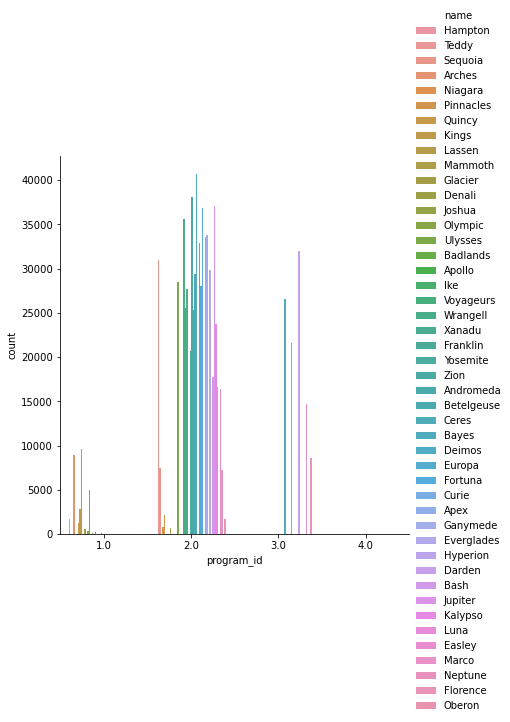

In [38]:
g = sns.catplot(x="program_id", hue="name",
                data=active_students, kind="count",
                height=6, aspect=1);

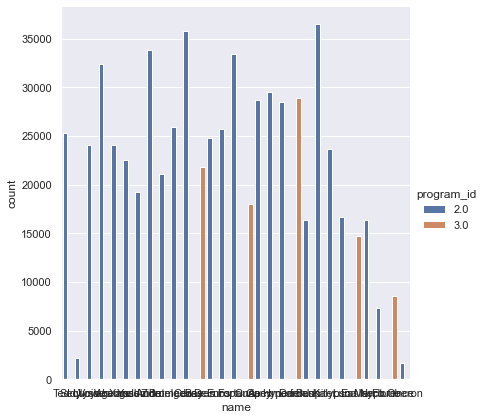

In [155]:
g = sns.catplot(x="name", hue="program_id",
                data=active_students, kind="count",
                height=6, aspect=1);

In [171]:
tempindex = df.time.value_counts().index

match dataframe with indices in an array

In [208]:
#create a df and use groupby with date, time, ip and the aggregation on the time, reset index, sort by time
scrapingip = df.groupby(['date', 'time', 'ip'])[['time']].agg([ 'count']).reset_index().sort_values(by=[('time', 'count')], ascending=False)

In [209]:
scrapingip.head()

,date,time,ip,time
,,,,count
195787,2019-03-03,22:52:09,204.44.112.76,30
195785,2019-03-03,22:52:07,204.44.112.76,30
195789,2019-03-03,22:52:11,204.44.112.76,25
195786,2019-03-03,22:52:08,204.44.112.76,25
195788,2019-03-03,22:52:10,204.44.112.76,25


In [210]:
scrapingip.columns

MultiIndex([('date',      ''),
            ('time',      ''),
            (  'ip',      ''),
            ('time', 'count')],
           )

In [213]:
scrapingip[scrapingip[('time', 'count')]> 10]

,date,time,ip,time
,,,,count
195787,2019-03-03,22:52:09,204.44.112.76,30
195785,2019-03-03,22:52:07,204.44.112.76,30
195789,2019-03-03,22:52:11,204.44.112.76,25
195786,2019-03-03,22:52:08,204.44.112.76,25
195788,2019-03-03,22:52:10,204.44.112.76,25
195784,2019-03-03,22:52:06,204.44.112.76,21
572770,2020-08-02,19:07:51,70.122.42.87,16
379188,2019-12-19,23:58:01,172.124.70.146,12
195790,2019-03-03,22:52:12,204.44.112.76,12


In [212]:
scrapingip[scrapingip[('time', 'count')]> 5].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 195787 to 779259
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   (date, )       138 non-null    object
 1   (time, )       138 non-null    object
 2   (ip, )         138 non-null    object
 3   (time, count)  138 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 5.4+ KB
